In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

import tensorflow as tf
import keras as kr
from sklearn.model_selection import train_test_split

import os 
from os import getcwd
from os.path import dirname,abspath
import pathlib as pl

import sys

home_path = "C:\\sebin\\ecg"
git_path = home_path+"\\ecg_data_wfdb"

sys.path.append(git_path)
from use.segment.pick import random_ecg
from use.segment.open import ecgtodf
from use.tensor.input import x_tensor_input,y_tensor_input

from sklearn.preprocessing import MinMaxScaler

In [34]:
#data
'''
02-07 
no faced beat

data  : each seg 5000 / q beat 15  /f beat 802 
train : test : 0.7:0.3 class개수에 맞게 쪼갬
train =  train(0.7) validation(0.3)

epoch : 100 
'''
#preprocessing: min - max scaler
#epoch 200


#데이터 더 많이


#plus train / test / validation 데이터 구별(test_data확인을 위해

'\n02-07 \nno faced beat\n\ndata  : each seg 5000 / q beat 15  /f beat 802 \ntrain : test : 0.7:0.3 class개수에 맞게 쪼갬\ntrain =  train(0.7) validation(0.3)\n\nepoch : 100 \n'

In [3]:
#1. file open to dataframe

In [4]:
input_folder = abspath(home_path+"\\save\\4beat_remove\\type2")
output_folder = abspath(home_path+"\\pick\\model02\\07")

In [5]:
#random_ecg(5000,input_folder,output_folder)



In [6]:
data = pd.DataFrame(ecgtodf(output_folder+"\\1_all"))

100_1003.csv
100_1008.csv
100_1042.csv
100_1053.csv
100_1055.csv
100_1057.csv
100_1075.csv
100_1078.csv
100_1079.csv
100_1085.csv
100_1094.csv
100_1099.csv
100_1103.csv
100_1109.csv
100_1115.csv
100_1120.csv
100_1125.csv
100_1169.csv
100_1208.csv
100_1215.csv
100_1217.csv
100_1219.csv
100_1229.csv
100_1235.csv
100_1258.csv
100_1272.csv
100_1276.csv
100_1279.csv
100_1292.csv
100_1295.csv
100_1297.csv
100_130.csv
100_1321.csv
100_1324.csv
100_1338.csv
100_1340.csv
100_1360.csv
100_1372.csv
100_1394.csv
100_1423.csv
100_1437.csv
100_1463.csv
100_1478.csv
100_1479.csv
100_1482.csv
100_1496.csv
100_1502.csv
100_1503.csv
100_1520.csv
100_1528.csv
100_1540.csv
100_1550.csv
100_1551.csv
100_1554.csv
100_1557.csv
100_1568.csv
100_1582.csv
100_1591.csv
100_1603.csv
100_1615.csv
100_1628.csv
100_1640.csv
100_168.csv
100_1685.csv
100_1710.csv
100_1711.csv
100_1719.csv
100_1735.csv
100_1743.csv
100_1746.csv
100_1784.csv
100_1785.csv
100_1818.csv
100_1826.csv
100_1843.csv
100_1853.csv
100_187.csv
10

In [7]:
record = data.iloc[:,:288].to_numpy()
ann = data.iloc[:,288].to_numpy()

In [8]:
record

array([['-0.235', '-0.225', '-0.22', ..., '-0.235', '-0.25', '-0.255'],
       ['-0.225', '-0.235', '-0.25', ..., '-0.23', '-0.22', '-0.235'],
       ['-0.29', '-0.28', '-0.26', ..., '-0.26', '-0.265', '-0.29'],
       ...,
       ['-0.025', '-0.02', '-0.04', ..., '-0.175', '-0.155', '-0.175'],
       ['-0.15', '-0.15', '-0.155', ..., '-0.17', '-0.16', '-0.155'],
       ['-0.275', '-0.27', '-0.265', ..., '-0.2', '-0.21', '-0.21']],
      dtype=object)

In [9]:
ann

array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype=object)

In [10]:
train_x,test_x,train_y,test_y = train_test_split(record,ann,test_size=0.3,random_state=40,stratify=ann)

In [11]:
train_x = pd.DataFrame(train_x)
train_y = pd.DataFrame(train_y)
test_x = pd.DataFrame(test_x)
test_y = pd.DataFrame(test_y)

In [12]:
train_x

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,-0.745,-0.74,-0.745,-0.75,-0.745,-0.755,-0.77,-0.785,-0.79,-0.79,...,-0.44,-0.45,-0.465,-0.47,-0.48,-0.49,-0.495,-0.5,-0.49,-0.5
1,-0.465,-0.48,-0.505,-0.52,-0.53,-0.495,-0.485,-0.495,-0.49,-0.475,...,-0.365,-0.355,-0.335,-0.32,-0.32,-0.32,-0.345,-0.325,-0.32,-0.315
2,-0.94,-0.935,-0.935,-0.91,-0.895,-0.875,-0.85,-0.835,-0.81,-0.785,...,-0.435,-0.44,-0.42,-0.405,-0.36,-0.34,-0.315,-0.275,-0.24,-0.22
3,-0.83,-0.84,-0.83,-0.81,-0.795,-0.785,-0.8,-0.83,-0.825,-0.795,...,-0.635,-0.64,-0.645,-0.62,-0.62,-0.63,-0.635,-0.65,-0.66,-0.66
4,-0.27,-0.275,-0.265,-0.26,-0.245,-0.25,-0.25,-0.245,-0.245,-0.245,...,-0.315,-0.31,-0.315,-0.32,-0.325,-0.33,-0.32,-0.32,-0.295,-0.315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9513,-0.725,-0.715,-0.7,-0.68,-0.645,-0.61,-0.565,-0.525,-0.485,-0.45,...,-0.29,-0.29,-0.285,-0.27,-0.22,-0.195,-0.15,-0.105,-0.06,-0.03
9514,-0.18,-0.175,-0.195,-0.175,-0.155,-0.135,-0.125,-0.145,-0.14,-0.12,...,-0.27,-0.27,-0.27,-0.255,-0.255,-0.27,-0.27,-0.26,-0.25,-0.255
9515,-0.235,-0.255,-0.27,-0.27,-0.28,-0.265,-0.26,-0.27,-0.285,-0.29,...,-0.34,-0.335,-0.315,-0.31,-0.31,-0.345,-0.35,-0.335,-0.31,-0.3
9516,-0.315,-0.32,-0.33,-0.315,-0.305,-0.295,-0.285,-0.3,-0.305,-0.31,...,-0.045,-0.05,-0.05,-0.045,-0.045,-0.035,-0.055,-0.065,-0.075,-0.09


In [13]:
train_y

,0
0,V
1,V
2,V
3,S
4,S
...,...
9513,F
9514,V
9515,V
9516,V


In [14]:
train_y.value_counts()

N    3500
V    3500
S    1947
F     561
Q      10
dtype: int64

In [15]:
test_x

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,-0.405,-0.37,-0.335,-0.29,-0.255,-0.225,-0.18,-0.145,-0.115,-0.085,...,-0.265,-0.255,-0.24,-0.22,-0.195,-0.16,-0.14,-0.1,-0.05,-0.03
1,-0.915,-0.91,-0.92,-0.925,-0.93,-0.93,-0.925,-0.905,-0.89,-0.89,...,-0.64,-0.66,-0.675,-0.695,-0.71,-0.71,-0.715,-0.72,-0.725,-0.74
2,-0.2,-0.195,-0.195,-0.195,-0.185,-0.185,-0.185,-0.19,-0.2,-0.22,...,-0.205,-0.2,-0.21,-0.205,-0.22,-0.215,-0.23,-0.235,-0.24,-0.26
3,-1.135,-1.135,-1.135,-1.115,-1.105,-1.1,-1.09,-1.105,-1.11,-1.095,...,-1.225,-1.205,-1.195,-1.185,-1.185,-1.185,-1.19,-1.205,-1.21,-1.21
4,0.075,0.1,0.13,0.12,0.14,0.155,0.18,0.21,0.235,0.235,...,-0.305,-0.32,-0.325,-0.32,-0.315,-0.3,-0.305,-0.31,-0.31,-0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,-0.16,-0.165,-0.17,-0.165,-0.15,-0.15,-0.155,-0.15,-0.16,-0.175,...,-0.155,-0.165,-0.155,-0.16,-0.17,-0.185,-0.195,-0.205,-0.205,-0.21
4076,-0.1,-0.1,-0.1,-0.135,-0.165,-0.17,-0.155,-0.17,-0.18,-0.215,...,-0.02,-0.12,-0.27,-0.36,-0.375,-0.325,-0.235,-0.18,-0.18,-0.25
4077,-0.34,-0.365,-0.355,-0.355,-0.375,-0.38,-0.395,-0.385,-0.385,-0.36,...,-0.115,-0.115,-0.12,-0.12,-0.135,-0.14,-0.125,-0.1,-0.125,-0.125
4078,-0.25,-0.24,-0.23,-0.215,-0.205,-0.19,-0.205,-0.23,-0.225,-0.215,...,0.045,-0.005,-0.005,0.01,0.04,0.05,0.035,0.015,0.0,0.01


In [16]:
test_y.value_counts()

N    1500
V    1500
S     834
F     241
Q       5
dtype: int64

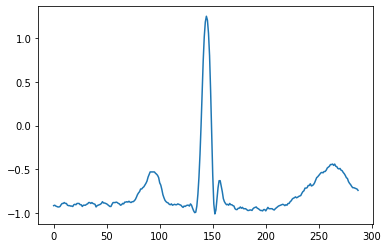

In [17]:
#N beat
t = test_x.iloc[1].to_numpy()
t = t.astype(np.float16)
plt.plot(t)

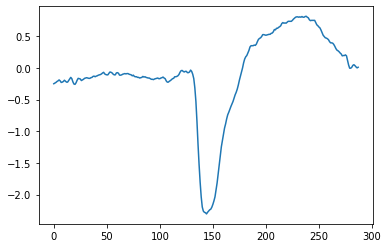

In [18]:
#V beat
t = test_x.iloc[4078].to_numpy()
t = t.astype(np.float16)
plt.plot(t)

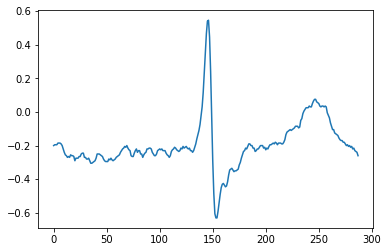

In [19]:
#S beat
t = test_x.iloc[2].to_numpy()
t = t.astype(np.float16)
plt.plot(t)

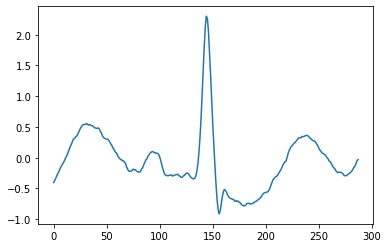

In [20]:
#f beat
t = test_x.iloc[0].to_numpy()
t = t.astype(np.float16)
plt.plot(t)

In [21]:
def to_mixmax_tensor(x,y):
    
    record = x.to_numpy()
    ann = y.to_numpy()
    
    t_record = record.T
    scaler = MinMaxScaler()
    scaler.fit(t_record)
    after_record = scaler.transform(t_record).T


    record = pd.DataFrame(after_record)
    ann = pd.DataFrame(ann)

    x=x_tensor_input(record)
    y=y_tensor_input(ann)

    return x,y

In [22]:
train_x,train_y = to_mixmax_tensor(train_x,train_y)
test_x,test_y = to_mixmax_tensor(test_x,test_y)


In [23]:
model = kr.models.load_model("C:\\sebin\\ecg\\ecg_data_wfdb\\model\\save\\02.h5")

In [24]:
model.compile(loss='sparse_categorical_crossentropy' ,optimizer='adam',metrics=['accuracy'])

In [25]:
history = model.fit(train_x,train_y,epochs=200,validation_split=0.3)

Epoch 1/200
209/209 [==============================] - 1s 5ms/step - loss: 0.9548 - accuracy: 0.6144 - val_loss: 0.6231 - val_accuracy: 0.7966
Epoch 2/200
209/209 [==============================] - 1s 4ms/step - loss: 0.5254 - accuracy: 0.8209 - val_loss: 0.4402 - val_accuracy: 0.8543
Epoch 3/200
209/209 [==============================] - 1s 4ms/step - loss: 0.4172 - accuracy: 0.8566 - val_loss: 0.3823 - val_accuracy: 0.8764
Epoch 4/200
209/209 [==============================] - 1s 4ms/step - loss: 0.3733 - accuracy: 0.8780 - val_loss: 0.3656 - val_accuracy: 0.8890
Epoch 5/200
209/209 [==============================] - 1s 4ms/step - loss: 0.3461 - accuracy: 0.8888 - val_loss: 0.3443 - val_accuracy: 0.8908
Epoch 6/200
209/209 [==============================] - 1s 4ms/step - loss: 0.3303 - accuracy: 0.8967 - val_loss: 0.3313 - val_accuracy: 0.8960
Epoch 7/200
209/209 [==============================] - 1s 4ms/step - loss: 0.3161 - accuracy: 0.9006 - val_loss: 0.3770 - val_accuracy: 0.8813

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']

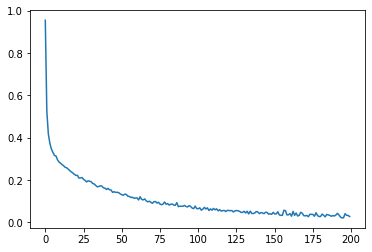

In [27]:
plt.plot(loss)

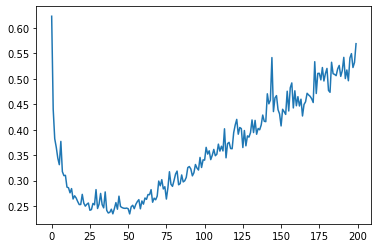

In [28]:
plt.plot(val_loss)

In [29]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

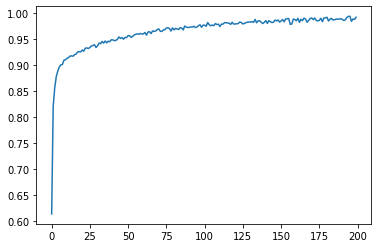

In [30]:
plt.plot(accuracy)

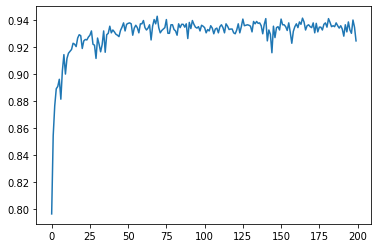

In [31]:
plt.plot(val_accuracy)

In [32]:
model.save(git_path+"\\test\\02\\07\\model01.h5")

In [33]:
results = model.evaluate(test_x,test_y)

128/128 [==============================] - 0s 1ms/step - loss: 0.5587 - accuracy: 0.9348


In [ ]:
model = kr.models.load_model("C:\\sebin\\ecg\\ecg_data_wfdb\\model\\save\\02.h5")
model.compile(loss='sparse_categorical_crossentropy' ,optimizer='adam',metrics=['accuracy'])
history = model.fit(train_x,train_y,epochs=50,validation_split=0.3)
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.plot(loss)

In [ ]:
plt.plot(val_loss)

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

In [ ]:
plt.plot(accuracy)

In [ ]:
plt.plot(val_accuracy)

In [ ]:
model.save(git_path+"\\test\\02\\07\\model02.h5")